1.-Implementar el método de simpson

**(Nota: Esta tarea la termine antes del martes, asi que no cheque si se agregó algo despues de eso, estoy suponiendo que una vez que se publica un tarea esta no cambia para que los que la adelantan no tengan que volver a hacerla. Si me han de bajar puntos esta bien, pero creo que salvo ciertas corecciones las tareas no deben modificarse despues de que se publican, por respeto al tiempo de los estudiantes.)**

In [ ]:

#=Esta funcion es muy parecida a aquellas que se construyeron los métodos de Riemann y el trapecio, se divide el intervalo dado en 200 y en cada ciclo se aplica el método para cada uno de esos subintervalos. En cada ciclo hay que guardar el valor inicial, medio y terminal del intervalo, y agregar la aproximacion de simpson para ese intervalo a una variable integral=#

function metodoSimpson(f::Function,a,b)
    n = 200
    delta = (b-a)/n
    xBefore
    xMiddle
    xAfter
    
    integral = 0
    
    for i in 1:n
        xBefore = a+(i-1)*delta
        xAfter = a+i*delta
        xMiddle = (xBefore +xAfter)/2
        
        integral += (f(xBefore) +f(xAfter) +4*f(xMiddle))*(delta/6)
    end
    return integral
end 

In [2]:
metodoSimpson(x->x^2,0,2)

2.666666666666666

2.-Implementar la interpolacion de Lagrange

In [1]:
using SymPy 
A,x,a,n,m=symbols("A,x,a,n,m")

#=Esta es la funcion de interpolacion de lagrange. basicamente la dificultad mas grande es que julia no deja redefinir funciones. es decir no se podria hacer por ejemplo un ciclo en el que se haga y2 = y2*algunaNuevaFuncion, entonces, las funciones intermedias que se obtienen al construir el producto de cocientes de la interpolacion de lagrange deben almacenarse. Esto es lo primero que hace la funcion. empieza a construir para cada uno de los puntos el producto de cocientes (con cociente me refiero a las funciones x-xj/xi-xj) los cocientes se agregan primero a un arreglo functionArray1. luego se construye el producto de la siguiente forma: se agrega el primer cociente al arreglo functionArray2, posteriormente se agrega al mismo functionArray2 el ultimo elemento del arreglo por el siguiente cociente, se hace esto hasta que el ultimo elemento de functionArray2 sea la multiplicacion de cocientes deseada, entonces esta multiplicacion de cocientes del punto i-esimo se guarda en otro arreglo functionArray3 y se vacian functionArray1 y functionArray2, se vuelve a hacer el proceso para obtener la multiplicacion de cocientes del siguiente punto. Una vez que se ha llenado functionArray3, hay que construir la suma de los terminos de este arreglo, cada uno multiplicado por la coordenada y del punto que le corresponde. Se sigue un proceso similar, y la funcion final queda como el ultimo elemento del arreglo interpolacionArray, y esto es lo que regresamos=#

function interpolacionLagrange(listaX, listaY)
    
    functionArray1 = []
    functionArray2 = []
    functionArray3 = []
    interpolacionArray = []
    
    for i in 1:length(listaX)
        for j in 1:length(listaX)
        
        if(!(listaX[j] == listaX[i]))    
                push!(functionArray1,x->(x-listaX[j])/(listaX[i]-listaX[j]))
            end
        end
    
        push!(functionArray3,functionArray1[1])
        for k in 2:length(functionArray1)
            push!(functionArray3,functionArray3[length(functionArray3)](x)*functionArray1[k](x))
        end       
        
        push!(functionArray2,functionArray3[length(functionArray3)](x))
        empty!(functionArray1)
        empty!(functionArray3)
    end 
    
    push!(interpolacionArray,functionArray2[1]*listaY[1])
    for k in 2:length(functionArray2)
               push!(interpolacionArray,interpolacionArray[length(interpolacionArray)](x)+functionArray2[k](x)*listaY[k])
    end 
    
    return interpolacionArray[length(interpolacionArray)]
end 

interpolacionLagrange (generic function with 1 method)

Interpolar el coseno de 0 a 2pi 

In [44]:
intervalo = linspace(0,2*pi,10)

#=Creamos un arreglo con la funcion cos(x) evaluada en el intervalo =#

intervaloY = cos.(intervalo)

y = simplify(interpolacionLagrange(intervalo,intervaloY))
println(y)

for i in intervalo
    
   println("el coseno es ",cos(i)," la interpolacion es  ",y(i))
    
end

5.42101086242752e-20*x^9 - 1.97979336357609e-5*x^8 + 0.000497576342932821*x^7 - 0.00411366974807148*x^6 + 0.00878850466168579*x^5 + 0.0243778891542608*x^4 + 0.020142554828432*x^3 - 0.512543349763748*x^2 + 0.00313254720748013*x + 1.0
el coseno es 1.0 la interpolacion es  1.00000000000000
el coseno es 0.766044443118978 la interpolacion es  0.766044443118961
el coseno es 0.17364817766693041 la interpolacion es  0.173648177666764
el coseno es -0.4999999999999998 la interpolacion es  -0.500000000000732
el coseno es -0.9396926207859083 la interpolacion es  -0.939692620788243
el coseno es -0.9396926207859084 la interpolacion es  -0.939692620792136
el coseno es -0.5000000000000004 la interpolacion es  -0.500000000014348
el coseno es 0.17364817766692997 la interpolacion es  0.173648177638373
el coseno es 0.7660444431189778 la interpolacion es  0.766044443070681
el coseno es 1.0 la interpolacion es  0.999999999934513


In [2]:
xArray = [0,2,3,4,5,6,7]
yArray = [10,-10,-4,0,5,20,-1]

y = simplify(interpolacionLagrange(xArray,yArray))

       6        5         4         3          2            
  173*x    113*x    4957*x    2731*x    54571*x    83*x     
- ------ + ------ - ------- + ------- - -------- + ---- + 10
   2520      84       504        84       1260      14      

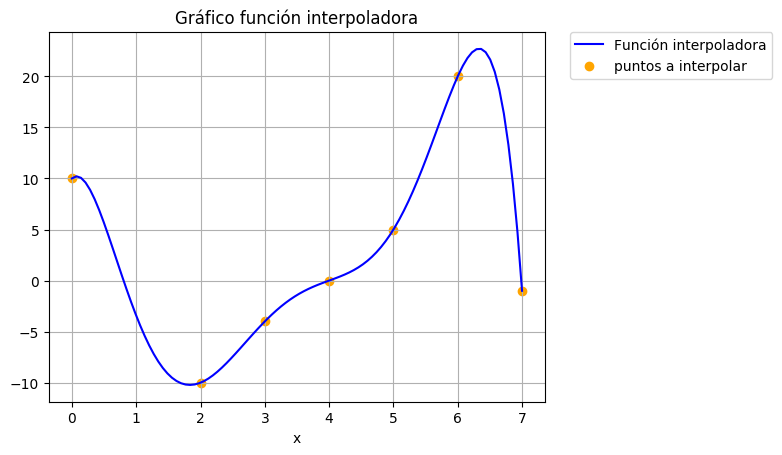

In [5]:
#=Vamos a graficar la funcion interpoladora =#
using PyPlot
plt = PyPlot
    x2 = linspace(0,7,100)
    y2 = y.(x2)


    plt.figure("the plot")
    plt.xlabel("x")
    plt.title("Gráfico función interpoladora")
    plt.grid()
    plt.scatter(xArray,yArray,color = "orange",label = "puntos a interpolar")
    
    #Gráfico de error
    plt.plot(x2,y2,color = "blue",label = "Función interpoladora")
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    
    plt.show()